In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Workshop/database.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [6]:
df.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [7]:
i=df[df['Victim Age']==998].index
df.drop(i,inplace=True)
df.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,637480.000000,637480.00000,637480.000000,637480.000000,637480.000000,637480.000000
mean,319114.850631,1995.79507,22.988102,33.562204,0.123303,0.185308
std,184279.143474,9.92599,92.213585,17.792594,0.537756,0.585502
min,1.000000,1980.00000,0.000000,0.000000,0.000000,0.000000
25%,159530.750000,1987.00000,1.000000,22.000000,0.000000,0.000000
50%,319054.500000,1995.00000,2.000000,30.000000,0.000000,0.000000
75%,478707.250000,2004.00000,10.000000,42.000000,0.000000,0.000000
max,638454.000000,2014.00000,999.000000,99.000000,10.000000,10.000000


In [8]:
df=df.replace('Unknown',np.nan)

In [9]:
df.isnull().sum()

Record ID                     0
Agency Code                   0
Agency Name                  47
Agency Type                   0
City                          0
State                         0
Year                          0
Month                         0
Incident                      0
Crime Type                    0
Crime Solved                  0
Victim Sex                  264
Victim Age                    0
Victim Race                5954
Victim Ethnicity         367379
Perpetrator Sex          189761
Perpetrator Age               0
Perpetrator Race         195437
Perpetrator Ethnicity    445491
Relationship             272210
Weapon                    32769
Victim Count                  0
Perpetrator Count             0
Record Source                 0
dtype: int64

In [10]:
col=df.columns.values
for x in col:
  df[x]=df[x].fillna((df[x].mode()[0]))

In [11]:
df.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [12]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Not Hispanic,Male,15,Native American/Alaska Native,Not Hispanic,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Not Hispanic,Male,42,White,Not Hispanic,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Not Hispanic,Male,0,White,Not Hispanic,Acquaintance,Handgun,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Not Hispanic,Male,42,White,Not Hispanic,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Not Hispanic,Male,0,White,Not Hispanic,Acquaintance,Handgun,0,1,FBI


In [13]:
df['Victim Age'].value_counts()

22    23049
20    23031
25    22939
21    22796
23    22438
      ...  
94      116
95       82
97       39
96       37
98       33
Name: Victim Age, Length: 100, dtype: int64

# **Data** **Visualisation**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

Let's start off with a simple countplot using seaborn

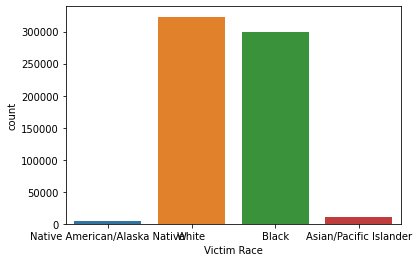

In [15]:
sns.countplot(x='Victim Race',data=df)

We use plt.figue to avoid overlapping x-axis labels.

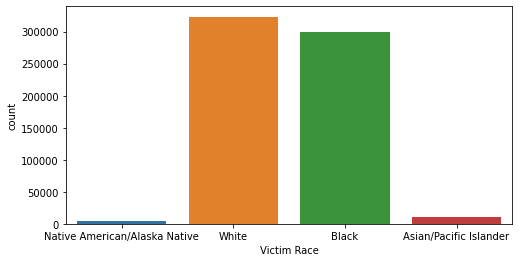

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='Victim Race',data=df)
plt.show()

We can also switch to Y-axis view

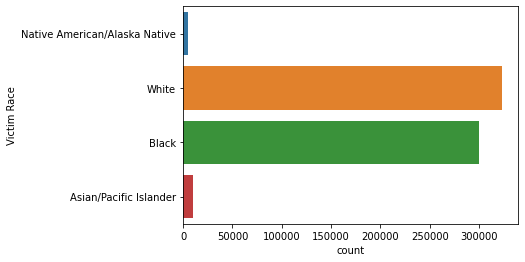

In [17]:
sns.countplot(y='Victim Race',data=df)

Now let's try adding another feature in the hue parameter(color encoding)

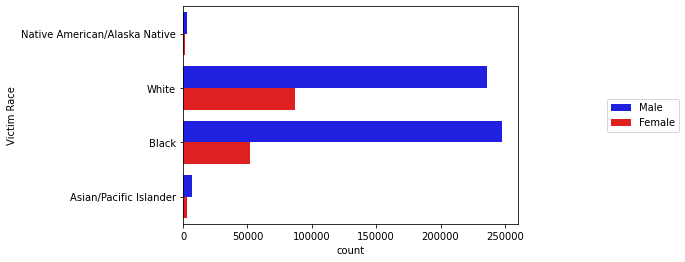

In [18]:
g=sns.countplot(y='Victim Race',hue='Victim Sex',palette={'red','blue'},data=df)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637480 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              637480 non-null  int64 
 1   Agency Code            637480 non-null  object
 2   Agency Name            637480 non-null  object
 3   Agency Type            637480 non-null  object
 4   City                   637480 non-null  object
 5   State                  637480 non-null  object
 6   Year                   637480 non-null  int64 
 7   Month                  637480 non-null  object
 8   Incident               637480 non-null  int64 
 9   Crime Type             637480 non-null  object
 10  Crime Solved           637480 non-null  object
 11  Victim Sex             637480 non-null  object
 12  Victim Age             637480 non-null  int64 
 13  Victim Race            637480 non-null  object
 14  Victim Ethnicity       637480 non-null  object
 15  

In [20]:
filter=df[df['Perpetrator Age'].astype(str).str.isnumeric()==False].index
df.drop(filter,inplace=True)
df.shape

(637479, 24)

In [21]:
df['Perpetrator Age']=pd.to_numeric(df['Perpetrator Age'])


In [22]:
df['Perpetrator Age'].value_counts()

0     215687
20     21611
19     20231
21     18962
18     18816
       ...  
95         9
98         7
96         7
2          6
97         3
Name: Perpetrator Age, Length: 100, dtype: int64

In [23]:
df['Crime Solved'].value_counts()

Yes    447803
No     189676
Name: Crime Solved, dtype: int64

Let's try out some scatter plots

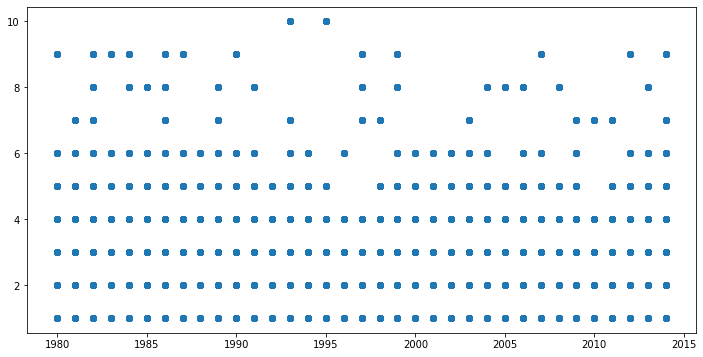

In [24]:
plt.figure(figsize=(12,6))
sc=df[df['Victim Count']>0]
plt.scatter(sc['Year'],sc['Victim Count'])
plt.show()

Barplots

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


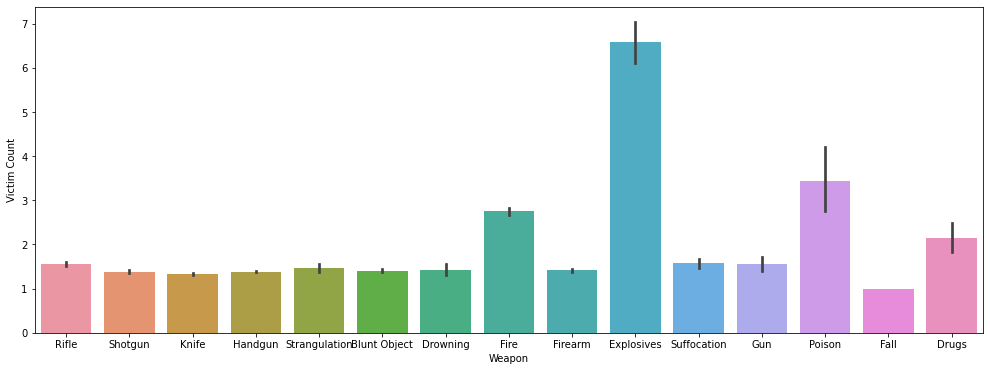

In [25]:
plt.figure(figsize=(17,6))
sns.barplot(sc['Weapon'],sc['Victim Count'])
plt.show()

This barplot shows us the average of the victim count per weapon

In [26]:
"""from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x=df.columns.values
for x in col:
  if df[x].dtype!=int:
    df[x]=le.fit_transform(df[x])"""

'from sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\nx=df.columns.values\nfor x in col:\n  if df[x].dtype!=int:\n    df[x]=le.fit_transform(df[x])'

In [27]:
#df.head(20)

In [36]:
#from sklearn.preprocessing import StandardScaler
df['State'].value_counts()

California              99739
Texas                   61995
New York                49181
Florida                 37039
Michigan                28393
Illinois                25860
Pennsylvania            24225
Georgia                 21061
North Carolina          20334
Louisiana               19597
Ohio                    19128
Maryland                17304
Virginia                15497
Tennessee               14884
Missouri                14821
New Jersey              14107
Arizona                 12842
South Carolina          11690
Indiana                 11447
Alabama                 11306
Oklahoma                 8801
Washington               7798
District of Columbia     7106
Arkansas                 6921
Colorado                 6589
Kentucky                 6545
Mississippi              6535
Wisconsin                6188
Massachusetts            6028
Nevada                   5546
Connecticut              4892
New Mexico               4268
Oregon                   4213
Minnesota 

Multiple barplots on the same figure

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

[Text(0.5, 1.0, 'Victim Count reported by each Agency ')]

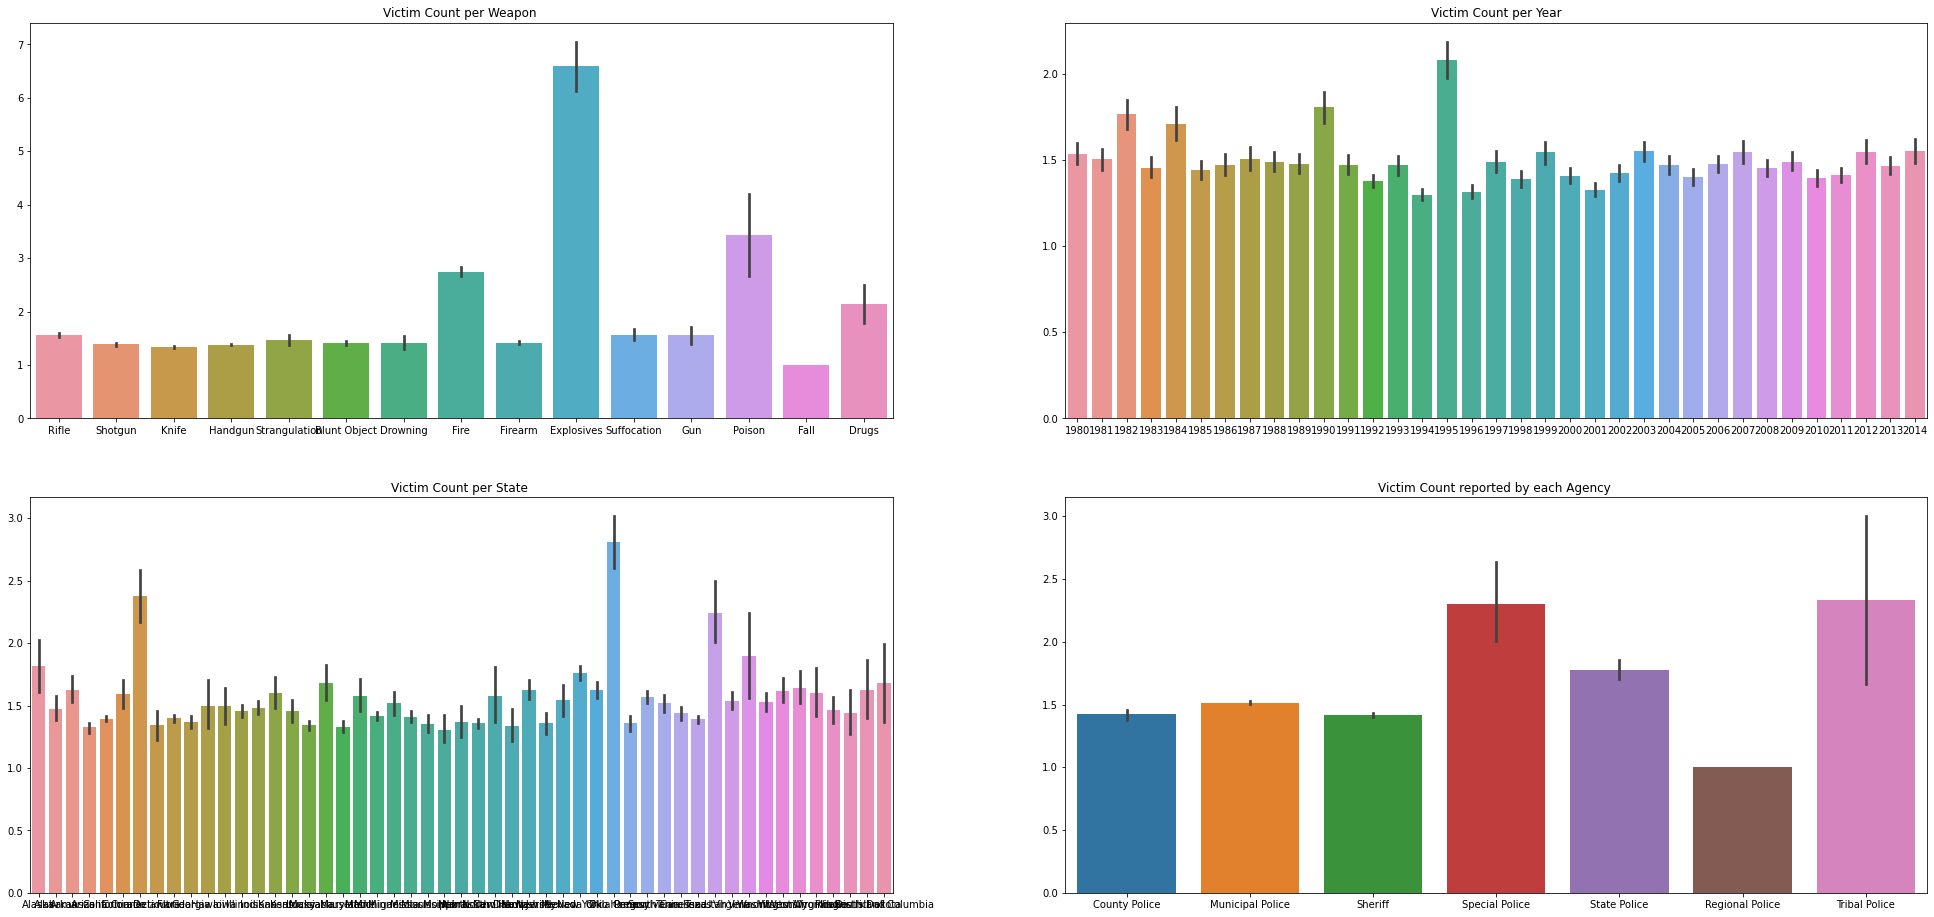

In [37]:
f, axes = plt.subplots(2, 2, figsize=(34, 16), sharex=False, sharey=False)
x = sc['Weapon'].values
y = sc['Victim Count'].values
sns.barplot(x, y, ax=axes[0,0])
axes[0,0].set( title = 'Victim Count per Weapon ')


x = sc['Year'].values
y = sc['Victim Count'].values
sns.barplot(x, y, ax=axes[0,1])
axes[0,1].set( title = 'Victim Count per Year')

x = sc['State'].values
y = sc['Victim Count'].values
sns.barplot(x, y, ax=axes[1,0])
axes[1,0].set( title = 'Victim Count per State ')

x = sc['Agency Type'].values
y = sc['Victim Count'].values
sns.barplot(x, y, ax=axes[1,1])
axes[1,1].set( title = 'Victim Count reported by each Agency ')

FacetGrid in order to correlate between more than 2 features

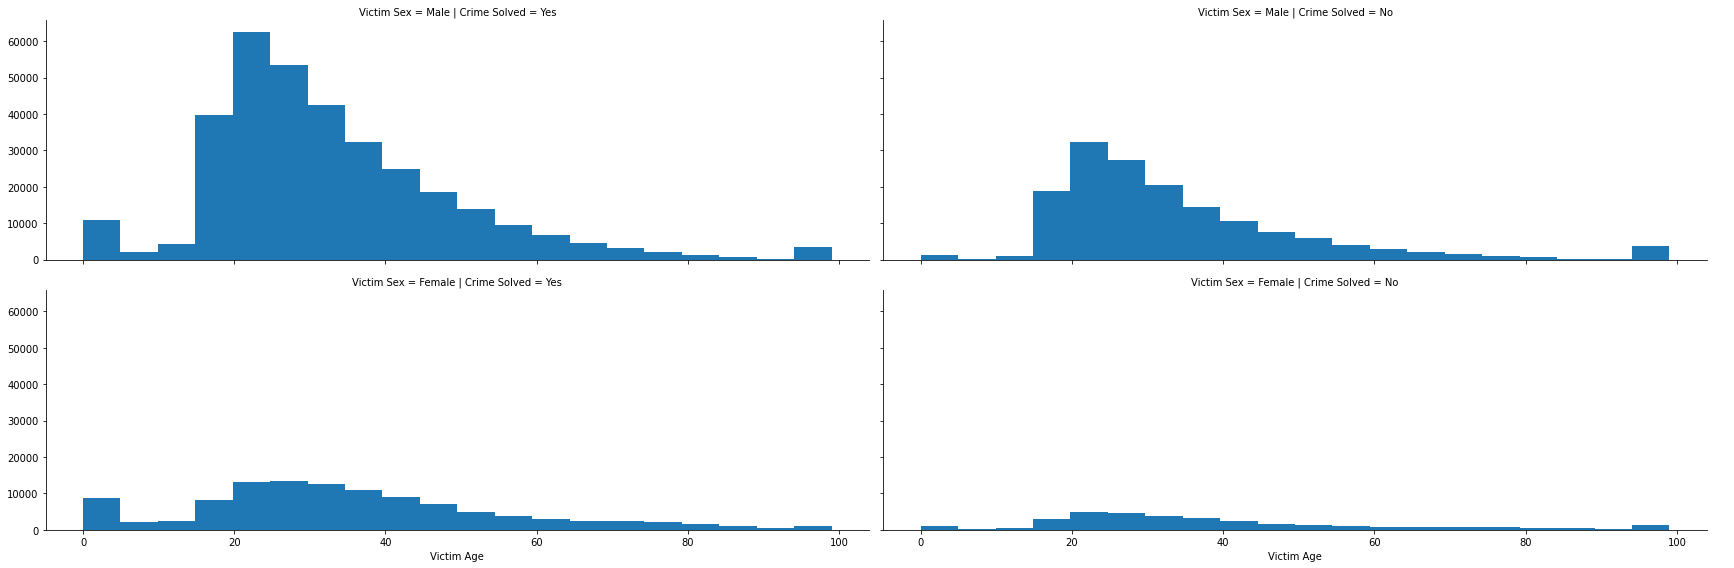

In [39]:
g=sns.FacetGrid(df,row='Victim Sex',col='Crime Solved',height=4,aspect=3)
g.map(plt.hist,'Victim Age',bins=20)
g.add_legend()